<a href="https://colab.research.google.com/github/khanhtran94/LearnConda/blob/master/scalr_garder_desicen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
learning_parameter = 0.01
epochs = 300

In [0]:
sample_points = 50

x_train = np.linspace(0,30,sample_points)
y_train = 6 * x_train + 7*np.random.randn(sample_points)

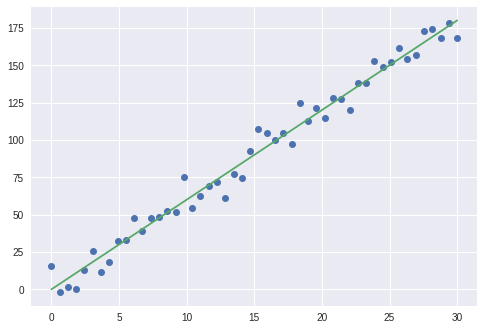

In [7]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train,6*x_train)
plt.show()

In [0]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

In [0]:
with tf.name_scope("Model") as scope:
  prediction = W*X + B

weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)


In [0]:
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)
  
cost_summary = tf.summary.scalar("Cose", cost_iteration)

In [0]:
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

init = tf.global_variables_initializer()
merger_summary = tf.summary.merge_all()

Epochs 0.000000 cost 0.058440 Weight 5.728817 Bias -1.451545
Epochs 40.000000 cost 1.198884 Weight 6.006901 Bias -1.262139
Epochs 80.000000 cost 1.193697 Weight 6.000966 Bias -1.107807
Epochs 120.000000 cost 1.189010 Weight 5.995592 Bias -0.968055
Epochs 160.000000 cost 1.184768 Weight 5.990725 Bias -0.841507
Epochs 200.000000 cost 1.180934 Weight 5.986318 Bias -0.726915
Epochs 240.000000 cost 1.177465 Weight 5.982327 Bias -0.623149
Epochs 280.000000 cost 1.174334 Weight 5.978713 Bias -0.529185


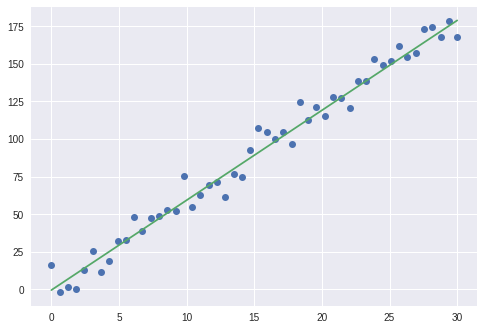

In [19]:
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter("./log", sess.graph)
  
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X: x, Y: y})
      
      summary_epochs = sess.run(merger_summary, feed_dict = {X: x, Y: y})
      writer.add_summary(summary_epochs, epoch)
      
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X: x, Y: y})
      print('Epochs %f cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
      
  Weight = sess.run(W)
  Bias = sess.run(B)
  
  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight*x_train+Bias)
  plt.show()